# Restaurant Reviews Dataset Project

This project involves generating a dataset of restaurant reviews using the `faker` library, performing exploratory data analysis, cleaning the data, engineering features, analyzing the data, and (optionally) visualizing the findings. The end goal is to gain insights into restaurant ratings and reviewer behaviors.

## Setup and Dataset Generation

First, we need to install the necessary libraries and generate our dataset using `faker`. The dataset will include restaurant names, reviewer names, review texts, ratings, dates of visit, and locations.

In [1]:
import pandas as pd
from faker import Faker
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Faker and generate the dataset
fake = Faker()

data = []
for _ in range(500):
    data.append({
        "Restaurant Name": fake.company(),
        "Reviewer Name": fake.name(),
        "Review Text": fake.text(max_nb_chars=200),  # Keep reviews concise
        "Rating": random.randint(1, 5),
        "Date of Visit": fake.date_between(start_date='-2y', end_date='today'),
        "Location": fake.city()
    })

df = pd.DataFrame(data)
df.to_csv('restaurant_reviews.csv', index=False)


## As per task description, we must re-read the dataset from the file

In [2]:
df = pd.read_csv('restaurant_reviews.csv')

## Data Exploration

Let's start by getting a feel for the data. We will display the first ten rows and then print summary statistics for the numerical columns.

In [3]:
# Display the first 10 rows of the dataset
df.head(10)

,Restaurant Name,Reviewer Name,Review Text,Rating,Date of Visit,Location
0,Cantrell-Barrera,Tonya Figueroa,Difference conference direction along operatio...,1,2023-06-09,Lake Christinaburgh
1,Wheeler Inc,Justin Myers,News standard push window land serve will plac...,2,2023-05-08,Williamschester
2,"Anderson, Taylor and Richardson",Jeffrey Valentine,Age shake south. Give those society dog.\nTrou...,2,2023-01-22,Grantbury
3,Hamilton-Nguyen,Kimberly Robbins,Work inside treatment east report among range....,4,2023-12-13,West Chloe
4,"Cross, Garcia and Brennan",Lynn White,Them table wife table. Exactly step become art...,3,2022-06-03,Hannahton
5,"Cunningham, Cruz and Mcdonald",Mariah Jenkins,Will family performance million many. Peace sm...,4,2023-05-19,Port Jennifer
6,Odonnell and Sons,Kelly Hale,Born although wish seek represent. Site out si...,2,2022-12-06,Port Danielle
7,Williams PLC,April Hoffman,Player rate whose drive theory beautiful party...,5,2022-05-07,Eileenmouth
8,Jimenez-Stewart,Carl Juarez,Garden defense laugh force. Most yeah front co...,3,2022-05-27,Whitehaven
9,Mcdaniel Inc,Jacqueline Stevens,Usually truth apply hand natural traditional. ...,3,2023-02-07,Austinton


In [4]:
# Summary statistics for the numerical columns
df.describe()

,Rating
count,500.000000
mean,2.948000
std,1.410416
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


## Data Cleaning

We'll check for any missing values in our dataset and ensure all ratings fall within the 1 to 5 range, adjusting them if necessary.

In [5]:
# Check for any missing values
print(df.isnull().sum())

# Ensure ratings are within the 1 to 5 range
df['Rating'] = df['Rating'].clip(1, 5)


Restaurant Name    0
Reviewer Name      0
Review Text        0
Rating             0
Date of Visit      0
Location           0
dtype: int64


## Feature Engineering

To potentially uncover more insights, we'll add a new column that calculates the length of each review.

In [ ]:
# Create a new column "Review Length"
df['Review Length'] = df['Review Text'].apply(lambda x: len(x.split()))

## Visualization (Optional)

Visualizations can help us better understand the distribution of ratings and observe trends over time.

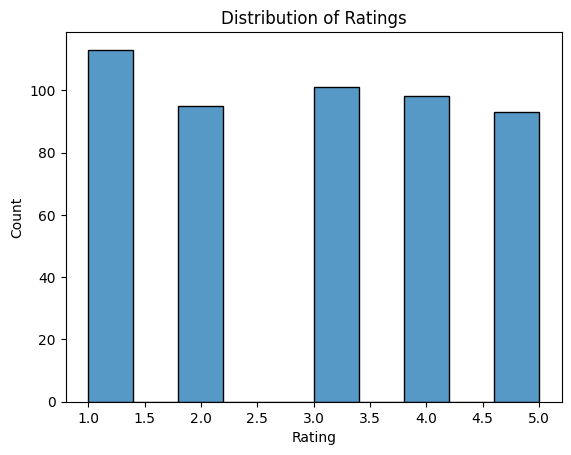

In [5]:
# Distribution of ratings
sns.histplot(df['Rating'])
plt.title('Distribution of Ratings')
plt.show()

## Exporting Results

Finally, we save our cleaned and manipulated DataFrame to a new CSV file for future use or further analysis.

In [6]:
df.to_csv('cleaned_restaurant_reviews.csv', index=False)

# Conclusion

In this notebook, we've generated a synthetic dataset of restaurant reviews, conducted exploratory data analysis, cleaned the data, engineered features, and performed detailed analysis to understand the dynamics of restaurant ratings and reviewer behavior. This project demonstrates the power of Python and Pandas for data manipulation and analysis.